In [108]:
import pandas as pd
import numpy as np

In [109]:
import matplotlib.pyplot as plr
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [110]:
df=pd.read_csv(r'C:\Users\rajak\OneDrive\Documents\DATA\100-days-of-machine-learning\day29-sklearn-pipelines\train.csv',usecols=['Age','Fare','Survived'])

In [111]:
df.dropna(inplace=True)

In [112]:
df.shape

(714, 3)

In [113]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [114]:
X=df.iloc[:,1:]
y=df.iloc[:,0]


In [115]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [116]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [117]:
clf=DecisionTreeClassifier()

In [118]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [119]:
accuracy_score(y_test,y_pred)

0.6363636363636364

In [120]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.630281690140845

In [121]:



kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [122]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [123]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

In [124]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [125]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [126]:
output=pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [127]:
output.head()

,age,age_trf,fare,fare_trf
328,31.0,8.0,20.5250,8.0
73,26.0,6.0,14.4542,7.0
253,30.0,8.0,16.1000,7.0
719,33.0,9.0,7.7750,2.0
666,25.0,6.0,13.0000,6.0


In [128]:
trf.named_transformers_['first'].bin_edges_[0].tolist()

[0.42,
 6.0,
 16.0,
 19.0,
 21.0,
 23.0,
 25.0,
 28.0,
 30.0,
 32.0,
 35.0,
 38.0,
 42.0,
 47.0,
 54.0,
 80.0]

In [129]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())

In [130]:

output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())


In [131]:
output.sample(8)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
453,49.00,13.0,89.1042,13.0,"(47.0, 54.0]","(76.292, 108.9]"
299,50.00,13.0,247.5208,14.0,"(47.0, 54.0]","(108.9, 512.329]"
698,49.00,13.0,110.8833,14.0,"(47.0, 54.0]","(108.9, 512.329]"
567,29.00,7.0,21.0750,8.0,"(28.0, 30.0]","(18.75, 26.0]"
288,42.00,12.0,13.0000,6.0,"(38.0, 42.0]","(10.5, 13.0]"
830,15.00,1.0,14.4542,7.0,"(6.0, 16.0]","(13.0, 14.454]"
148,36.50,10.0,26.0000,9.0,"(35.0, 38.0]","(18.75, 26.0]"
831,0.83,0.0,18.7500,8.0,"(0.42, 6.0]","(14.454, 18.75]"


In [132]:
import matplotlib.pyplot as plt

In [140]:
def Discretizer(bins,strategy):
    kbin_age=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare==KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    trf=ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_age,[1])
    ])
    trf_X=trf.fit_transform(X)
    

    plt.figure(figsize=(14,8))
    plt.subplot(121)
    plt.hist(X['Age'],color='m')
    plt.title('Age_Before')
 
    plt.subplot(122)
    plt.hist(trf_X[:,0],color='r')
    plt.title('Age_After')
    plt.show()
   
    
    
    plt.figure(figsize=(14,8))
    plt.subplot(121)
    plt.hist(X['Fare'],color='m')
    plt.title('Fare_Before')
 
    plt.subplot(122)
    plt.hist(trf_X[:,1],color='r')
    plt.title('Fare_After')
    plt.show()
    
    
    
   

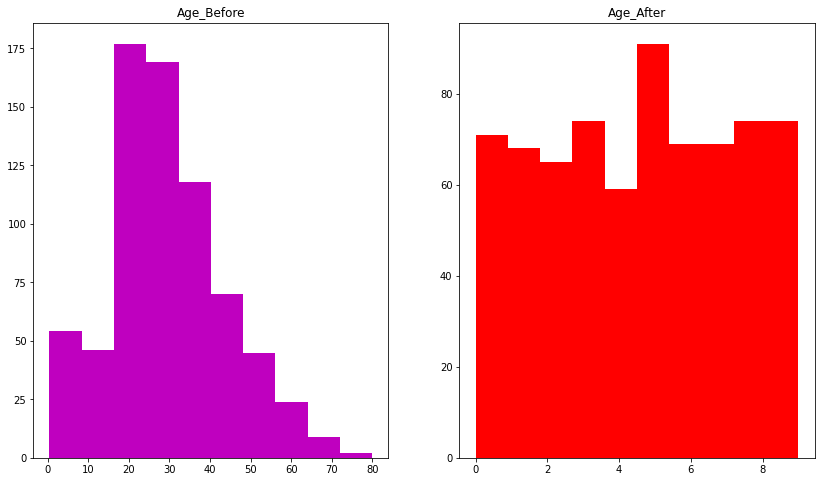

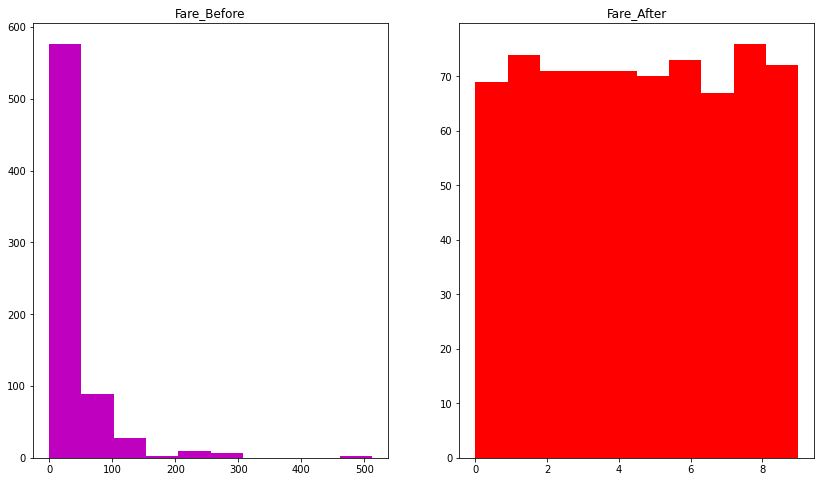

In [141]:
Discretizer(10,'quantile')